# TEST different approach
The aim of this notbook is to try to use what we learn with the previous technique to propose a now class algorithm for corneal classification.

In [1]:
from src.image_OCT import *
from src.image_Quantification_3 import *
import math 
from sklearn import svm
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
%matplotlib inline

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


## Exemple of treatments

In [2]:
filepathname_haze1=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
filepathname_haze2=os.path.join(dirname, 'Data','HAZE','haze 3.jpg')
filepathname_healthy1=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
filepathname_healthy2=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')
filepathname_fuchs1=os.path.join(dirname, 'Data','Fuchs_2','VANLUD_OD_6_Line.jpg')
# filepathname_fuchs2=os.path.join(dirname, 'Data','Fuchs_2','FAIJEA_OS_1_Line.jpg')
filepathname_fuchs2=os.path.join(dirname, 'Data','Fuchs_2','SELNIC_OS_0_Line.jpg')

# filepathname=os.path.join(dirname, 'Data','Healthy','80608_REZAZK_OS.jpg')
test_ex=[filepathname_haze1,filepathname_haze2,filepathname_healthy1,filepathname_healthy2,filepathname_fuchs1,filepathname_fuchs2]
test_type=["haze1","haze2","healthy1","healthy2","fuchs1",'fuchs2']

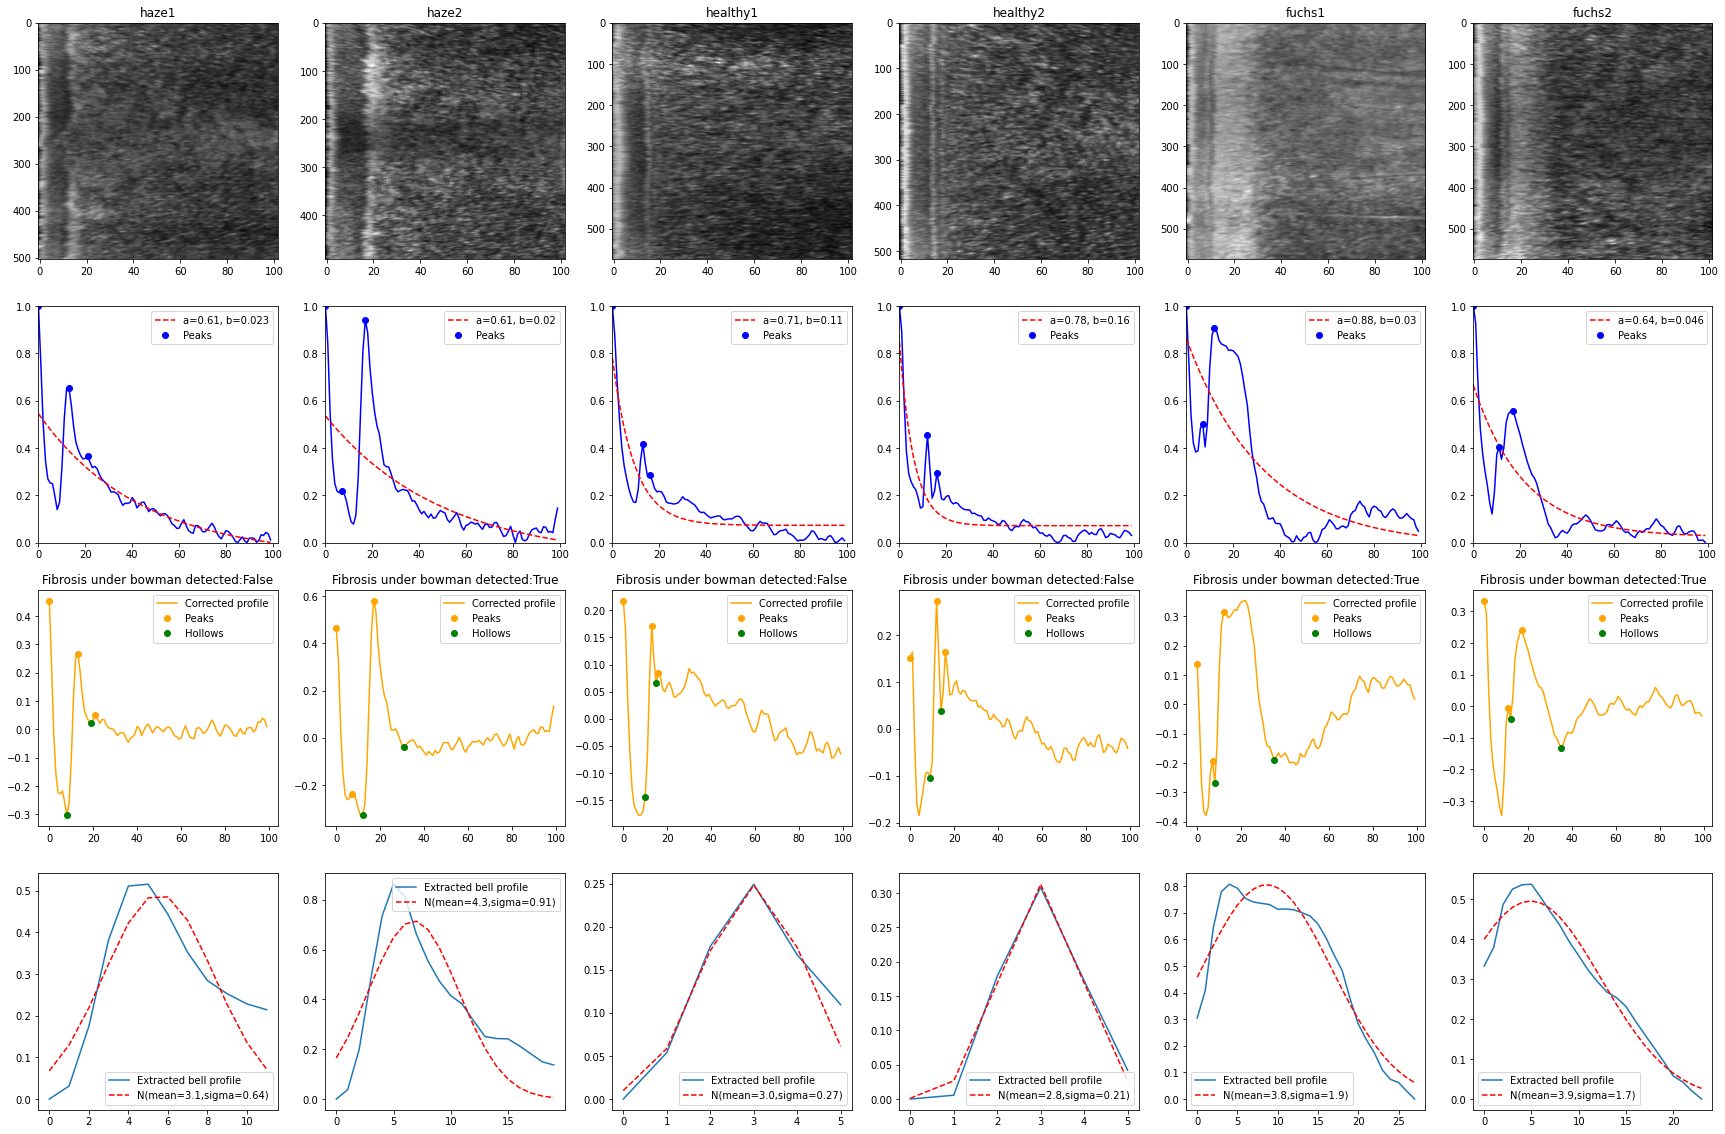

In [3]:
n=len(test_ex)
fig,ax=plt.subplots(4,n,figsize=(30,20))
move=False;eliminate=30;useExpCorr=False
for i,filepathname in enumerate(test_ex):
    name=test_type[i]
    im=image_OCT(filepathname)
    im.AutoTreatment()
    im_Q=image_Quantification_3(im,movingWin=False,eliminate=eliminate,useExpCorr=useExpCorr)
    ax[0][i].imshow((im_Q.image[im_Q.peaks[0]-im_Q.pre_window:im_Q.peaks[0]+im_Q.post_window][:]).T,aspect="auto",cmap="gray")
    ax[0][i].set_title(name)
    ax[1][i].plot(im_Q.iProfileCrop,'b')
    ax[1][i].plot(im_Q.iProfileExp,'r--',label="a={:.2}, b={:.2}".format(im_Q.Alpha,im_Q.Beta))
    ax[1][i].plot(im_Q.peaks-im_Q.xmin,im_Q.iProfileCrop[im_Q.peaks-im_Q.xmin],"bo",label="Peaks")
    ax[1][i].legend()
    ax[1][i].set_xlim([0,im_Q.pre_window+im_Q.post_window])
    ax[1][i].set_ylim([0,1])
    ax[2][i].plot(im_Q.iProfileExpCorrection,'orange',label='Corrected profile')
    ax[2][i].plot(im_Q.peaks-im_Q.xmin,im_Q.iProfileExpCorrection[im_Q.peaks-im_Q.xmin],color="orange",marker="o",linestyle='',label="Peaks")
    ax[2][i].plot(im_Q.hollows-im_Q.xmin,im_Q.iProfileExpCorrection[im_Q.hollows-im_Q.xmin],color="green",marker="o",linestyle='',label="Hollows")
    ax[2][i].set_title("Fibrosis under bowman detected:"+str(im_Q.underBowman))
    ax[2][i].legend()
    ax[3][i].plot(im_Q.iProfileBell-np.min(im_Q.iProfileBell),label="Extracted bell profile")
    ax[3][i].plot(im_Q.iProfileBellGauss,'r--',label="N(mean={:.2},sigma={:.2})".format(im_Q.Mean,im_Q.Sigma))
    ax[3][i].legend()
plt.show()

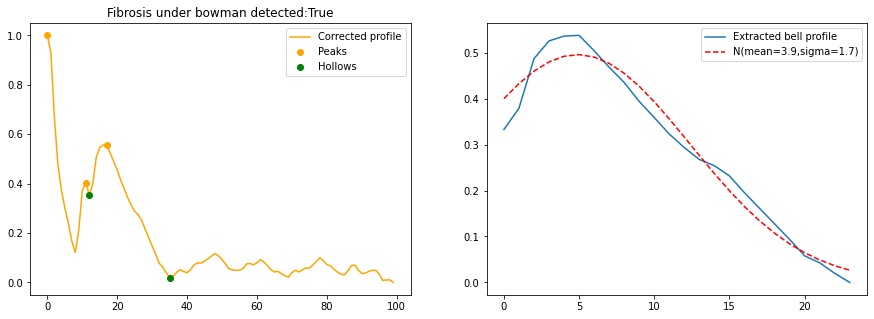

In [4]:
im=image_OCT(filepathname_fuchs2)
im.AutoTreatment()
im_Q=image_Quantification_3(im,movingWin=False,eliminate=eliminate,useExpCorr=useExpCorr)
im_Q.Plot_ProfileQuantif()

## Computing data sets:

In [5]:
# Compute or import dataset
move=True
useExpCorr=False
# folder="exp_correction/"
# append="_mov_win-exp_corr_"
append="_mov_win_"
folder=""

try:
	data_healthy = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy"+append+".pkl")
	data_healthy_2 = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy_2"+append+".pkl")
	data_haze = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_haze"+append+".pkl")
	data_haze_2 = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_haze_2"+append+".pkl")
	data_fuchs = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_fuchs"+append+".pkl")
	data_fuchs_rep = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_fuchs_rep"+append+".pkl") 
	print("Succesfully imported")
except:
	repertory_healthy=os.path.join(dirname, 'Data','Healthy')
	healthy_value=1 #healthy
	data_healthy=create_new_dataset(repertory_healthy,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)

	repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
	healthy_value=1 #healthy
	data_healthy_2=create_new_dataset(repertory_healthy_2,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)

	repertory_haze=os.path.join(dirname, 'Data','HAZE')
	healthy_value=0 #patho
	data_haze=create_new_dataset(repertory_haze,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)

	repertory_haze_2=os.path.join(dirname, 'Data','HAZE_2')
	healthy_value=0 #patho
	data_haze_2=create_new_dataset(repertory_haze_2,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)

	repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_2')
	healthy_value=2 #fushs
	data_fuchs=create_new_dataset(repertory_fuchs,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)

	repertory_fuchs_rep=os.path.join(dirname, 'Data','repetabilite_FuchsDMEK')
	healthy_value=2 #fushs
	data_fuchs_rep=create_new_dataset(repertory_fuchs_rep,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)

	data_healthy.to_pickle("./Dataset/data_set_Q3_healthy"+append+".pkl")
	data_healthy_2.to_pickle("./Dataset/data_set_Q3_healthy_2"+append+".pkl")
	data_haze.to_pickle("./Dataset/data_set_Q3_haze"+append+".pkl")
	data_haze_2.to_pickle("./Dataset/data_set_Q3_haze_2"+append+".pkl")
	data_fuchs.to_pickle("./Dataset/data_set_Q3_fuchs"+append+".pkl")
	data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep"+append+".pkl")

Succesfully imported


In [6]:
data_healthy

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Alpha,Beta,IntensityPeak,Healthy,Origin
0,1.564723,0.357256,0.011095,3.013937,0.071527,0.048305,0.800103,0.157229,0.501436,1,23923_BOULIS_OD
1,1.243494,0.274934,0.017582,3.340836,0.097157,0.037143,-0.227268,0.241946,0.549070,1,79296_BESNIC_OD
2,1.309080,0.305168,0.021760,3.099229,0.108918,0.038853,0.850396,0.234769,0.707970,1,80552_CORANT_OD
3,1.432038,0.338219,0.032628,2.788099,0.117584,0.055802,0.428578,0.291449,0.662627,1,80552_CORANT_OS
4,1.438476,0.328547,0.014145,2.856302,0.085840,0.042293,0.771240,0.126761,0.647156,1,80553_DUMFAU_OD
5,1.298660,0.271257,0.018810,2.690646,0.075393,0.054126,0.810627,0.282446,0.509573,1,80553_DUMFAU_OS
6,1.796238,0.533211,0.006804,3.136179,0.102036,0.042297,0.905923,0.318419,0.512751,1,80608_REZAZK_OD
7,1.218311,0.346046,0.014594,3.109893,0.107305,0.027941,0.758560,0.418982,0.473067,1,80608_REZAZK_OS
8,1.273352,0.246040,0.038992,2.980408,0.076108,0.066563,0.817529,0.217229,0.733642,1,81225_GOLDIM_OD
9,1.280900,0.233437,0.031497,2.946821,0.047062,0.083440,0.823523,0.171189,0.700803,1,81225_GOLDIM_OS


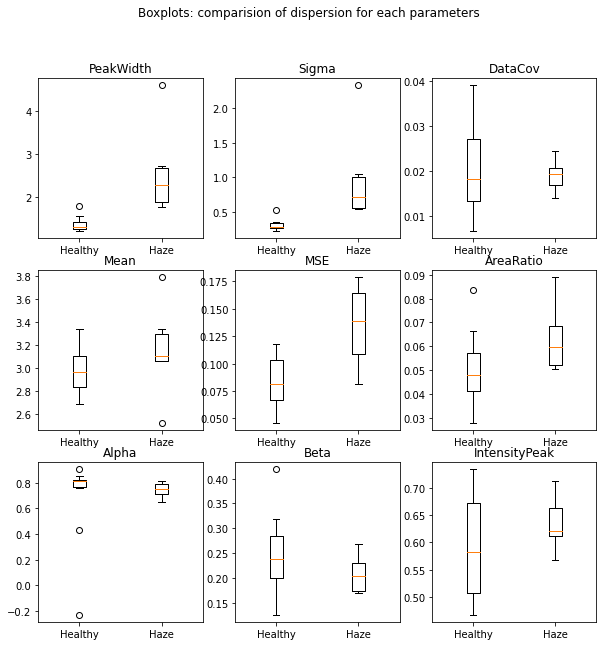

In [7]:
variable=data_healthy.columns[:-2]
k=len(variable)

column=int(np.sqrt(k))
line=int(k/column)
fig,ax=plt.subplots(line,column,figsize=(10,10))
fig.suptitle('Boxplots: comparision of dispersion for each parameters', fontsize=12)
for i in range(line):
	for j in range(column):
		p=i*line+j
		if p<k:
			var_name=variable[p]
			ax[i][j].boxplot([data_healthy[var_name],data_haze[var_name]])
			ax[i][j].set_xticklabels(["Healthy","Haze"])
			ax[i][j].set_title(var_name)
		

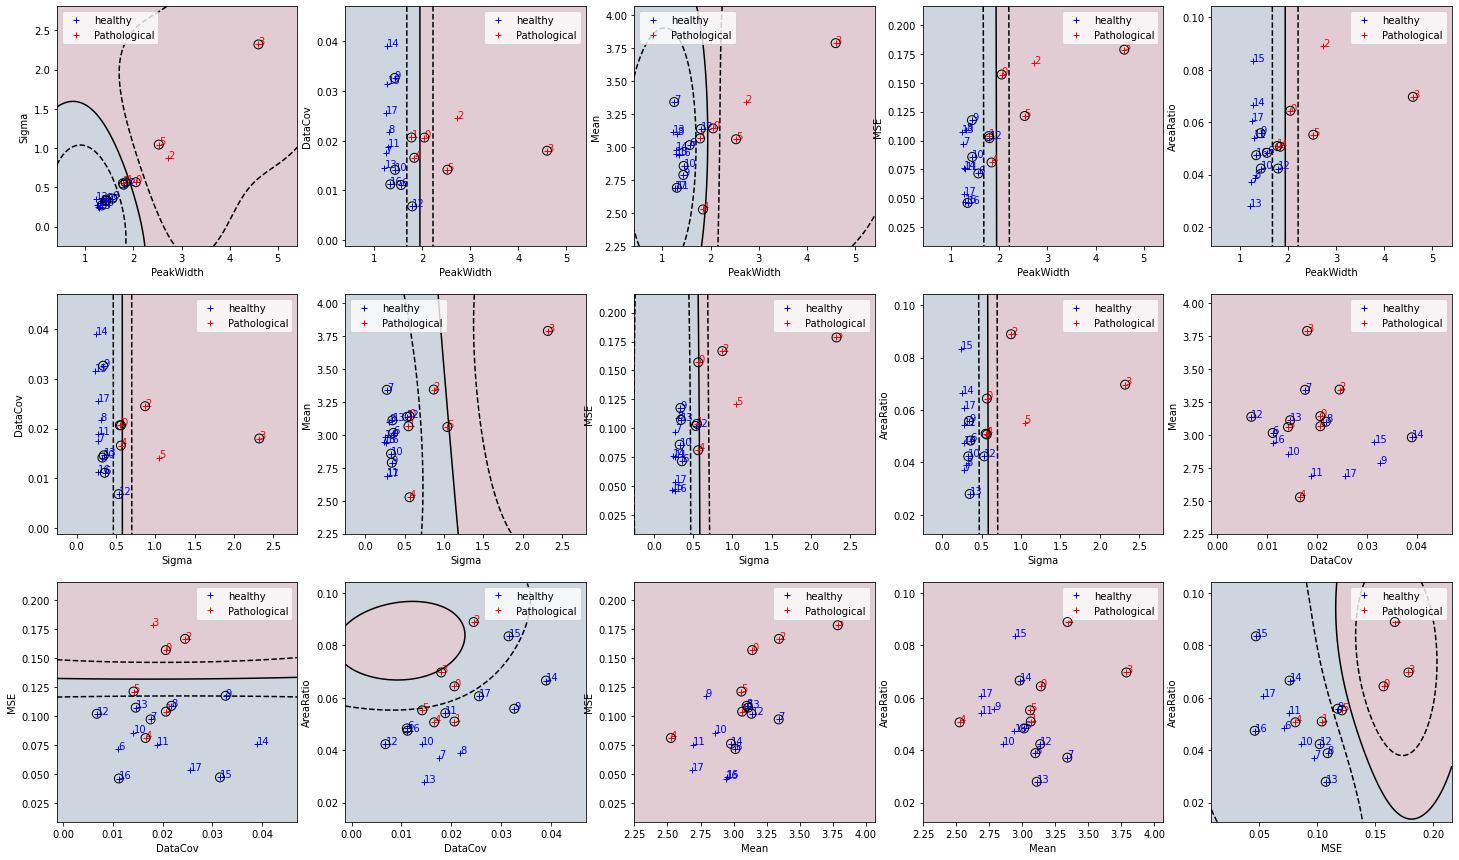

In [8]:
#Plot two by two
import warnings
warnings.filterwarnings("ignore")
data_learning=pd.concat([data_haze,data_healthy],ignore_index=True)
data=data_learning
data_copy=data.drop(["Healthy","Origin","Alpha","Beta","IntensityPeak"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
data_set_mean=np.mean(data_copy,0)
data_set_std=np.std(data_copy,0)
cor=data_copy.corr()
# sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True )

variable=data_copy.columns
k=len(variable)
comb=math.comb(k,2)
	
nline=3
ncol=comb//nline+int(comb/nline-comb//nline+0.5)
plt.figure(figsize=(ncol*5,nline*5))
l=0
for i in range(k-1):
    for j in range(i+1,k):
        l+=1
        plt.subplot(nline,ncol,l)
        x_class1=data[variable[i]][data["Healthy"]==1]
        y_class1=data[variable[j]][data["Healthy"]==1]
        x_class0=data[variable[i]][data["Healthy"]==0]
        y_class0=data[variable[j]][data["Healthy"]==0]
        plt.plot(x_class1.T,y_class1.T,"b+",label="healthy")
        plt.plot(x_class0.T,y_class0.T,"r+",label="Pathological")
        for m in range(len(data)):
            if data["Healthy"][m]==1:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="blue")
            else:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="red")
        X=data[variable[i]]
        Y=data[variable[j]]
        Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
        C=np.array([data["Healthy"].to_numpy()]).T
        clf = svm.SVC()
        clf.fit(Z, C)
        x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
        x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
        y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
        y_max = Z[:, 1].max()+1*np.std(Z[:, 1])
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
        plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
        plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=0.1)
        plt.xlabel(variable[i])
        plt.ylabel(variable[j])
        plt.legend()
        

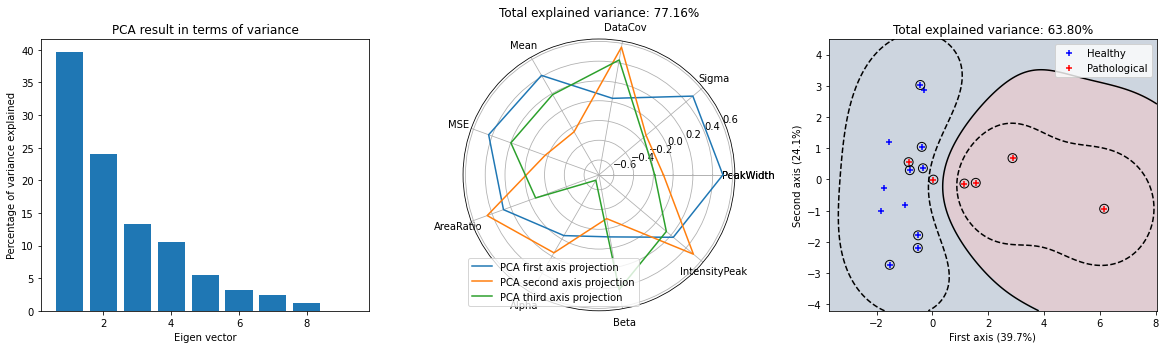

In [9]:
# PCA
data_copy=data.drop(["Healthy","Origin"],axis=1)
data_set_mean=np.mean(data_copy,0)
data_set_std=np.std(data_copy,0)
data_copy=(data_copy-data_set_mean)/data_set_std
N=len(data_copy)
K=len(data_copy.columns)
pca = PCA()
pca.fit(data_copy)


plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(np.arange(1,K+1,1),pca.explained_variance_ratio_*100)
plt.xlabel('Eigen vector')
plt.ylabel('Percentage of variance explained')
plt.title("PCA result in terms of variance")
plt.subplot(132,polar=True)
categories = data_copy.columns
categories = [*categories, categories[0]]
axis1= pca.components_[0]
axis1 = [*axis1, axis1[0]]
axis2= pca.components_[1]
axis2 = [*axis2, axis2[0]]
axis3= pca.components_[2]
axis3 = [*axis3, axis3[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(axis1))
plt.plot(label_loc, axis1, label='PCA first axis projection')
plt.plot(label_loc, axis2, label='PCA second axis projection')
plt.plot(label_loc, axis3, label='PCA third axis projection')
plt.title("Total explained variance: {:.2f}%".format(np.sum(pca.explained_variance_ratio_[0:3])*100))
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T
clf = svm.SVC()
clf.fit(Z, C)
x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
y_max = Z[:, 1].max()+1*np.std(Z[:, 1])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.subplot(133)
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.title("Total explained variance: {:.2f}%".format(np.sum(pca.explained_variance_ratio_[0:2])*100))
plt.legend()

# pca = PCA(n_components=2)
# data_proj=pca.fit(data_copy,data["Healthy"])

In [10]:
data_haze_2

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Alpha,Beta,IntensityPeak,Healthy,Origin
0,1.605194,0.382062,0.011347,2.964320,0.070656,0.056229,-14.765116,0.187385,0.468861,0,AUBOLI_OD_Line_normal_1
1,1.024928,0.223566,0.010415,2.888483,0.044398,0.035267,-10.636429,0.242152,0.443530,0,AUBOLI_OD_Line_PKR_M01_1
2,0.995652,0.227911,0.008694,2.833020,0.033725,0.034662,0.805245,0.222168,0.445285,0,AUBOLI_OD_Line_PKR_M07_1
3,2.819735,1.102241,0.005626,3.845244,0.128985,0.065557,1.004057,0.208184,0.555486,0,AUBOLI_OD_Line_PKR_M18_1
4,1.021827,0.231334,0.007319,2.928579,0.041154,0.033004,0.280825,0.286525,0.329916,0,AUBOLI_OS_Line_normal_1
5,1.610037,0.506565,0.011435,2.719505,0.055126,0.032803,0.882556,0.237283,0.446472,0,AUBOLI_OS_Line_normal_2
6,1.640109,0.473303,0.010201,3.319169,0.083093,0.041798,-1.957560,0.189256,0.482242,0,BOUEMI_OD_Line_normal_1
7,2.576825,0.865912,0.015720,3.010923,0.083440,0.072071,1.226683,0.031283,0.800573,0,BOUEMI_OD_Line_normal_2
8,1.561830,0.479793,0.007671,2.874268,0.061503,0.032562,0.805286,0.148055,0.498977,0,BOUEMI_OS_Line_normal_1
9,1.049791,0.225160,0.018822,2.985531,0.077278,0.033685,0.796789,0.262203,0.551860,0,BOUEMI_OS_Line_PKR_M03_1


In [11]:
if 'Month' not in data_haze_2.columns:
	origin=data_haze_2["Origin"]
	n=len(origin)
	month=[]
	id_patient=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		if text[-2]=="normal":
			month.append(0)
		else:
			month.append(int(text[-2][1:]))
		id_patient.append(text[0])
		eye.append(text[1])

	data_haze_2["Month"]=month
	data_haze_2["Id_patient"]=id_patient
	data_haze_2["Eye"]=eye
	data_haze_2.to_pickle("./Dataset/data_set_Q3_haze_2.pkl")

In [12]:
data_copy=data_healthy.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_healthy.filter(["Healthy","Origin"], axis=1)
new['X']=X;new['Y']=Y;new['Z']=Z
data_healthy_new=new

data_copy=data_haze.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_haze.filter(["Healthy","Origin"], axis=1)
new['X']=X;new['Y']=Y;new['Z']=Z
data_haze_new=new

data_copy=data_healthy_2.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_healthy_2.filter(["Healthy","Origin"], axis=1)
new['X']=X;new['Y']=Y;new['Z']=Z
data_healthy2_new=new

data_copy=data_haze_2.drop(["Healthy","Origin","Month","Eye","Id_patient"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_haze_2.filter(["Healthy","Origin","Eye","Id_patient","Month"], axis=1)
new['X']=X;new['Y']=Y;new['Z']=Z
data_haze2_new=new

data_copy=data_fuchs.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_fuchs.filter(["Healthy","Origin"], axis=1)
new['X']=X;new['Y']=Y;new['Z']=Z
data_fuchs_new=new

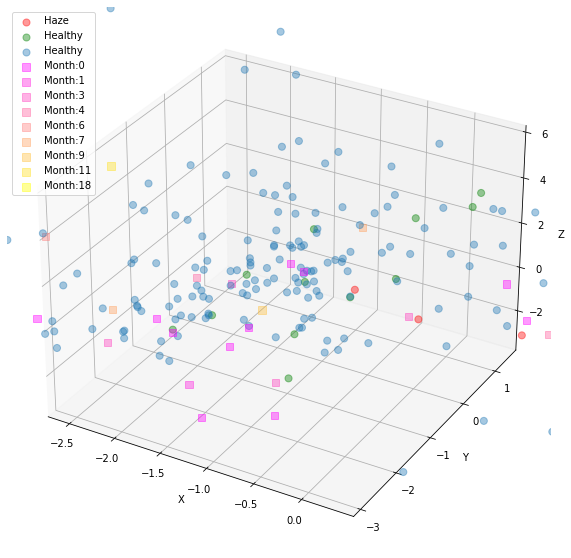

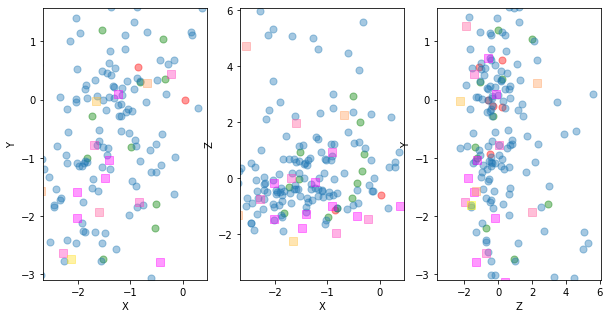

In [13]:
warnings.filterwarnings("ignore")
from matplotlib import cm

df=pd.concat([data_haze2_new,data_healthy2_new],ignore_index=True)
colors = cm.spring(np.linspace(0, 1, len(np.unique(data_haze2_new["Month"]))))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

alpha=0.4
ax.scatter(data_haze_new["X"],data_haze_new["Y"],data_haze_new["Z"],marker='o',c='r',s=50,label="Haze",alpha=alpha)
ax.scatter(data_healthy_new["X"],data_healthy_new["Y"],data_healthy_new["Z"],marker='o',c='g',s=50,label="Healthy",alpha=alpha)
ax.scatter(data_healthy2_new["X"],data_healthy2_new["Y"],data_healthy2_new["Z"],marker='o',s=50,label="Healthy",alpha=alpha)
for i,m in enumerate(np.unique(data_haze2_new["Month"])):
	filter=data_haze2_new["Month"]==m
	ax.scatter(data_haze2_new["X"][filter],data_haze2_new["Y"][filter],data_haze2_new["Z"][filter],marker='s',color=colors[i],s=50,label="Month:"+str(m),alpha=alpha)

ax.legend()
ax.set_xlabel("X");ax.set_ylabel("Y");ax.set_zlabel("Z")
ax.set_xlim([np.mean(df["X"])-np.std(df["X"]),np.mean(df["X"])+np.std(df["X"])])
ax.set_ylim([np.mean(df["Y"])-np.std(df["Y"]),np.mean(df["Y"])+np.std(df["Y"])])
ax.set_zlim([np.mean(df["Z"])-np.std(df["Z"]),np.mean(df["Z"])+np.std(df["Z"])])

fig,ax=plt.subplots(1,3,figsize=(10,5))
ax[0].scatter(data_haze_new["X"],data_haze_new["Y"],marker='o',c='r',s=50,label="Haze",alpha=alpha)
ax[0].scatter(data_healthy_new["X"],data_healthy_new["Y"],marker='o',c='g',s=50,label="Healthy",alpha=alpha)
ax[0].scatter(data_healthy2_new["X"],data_healthy2_new["Y"],marker='o',s=50,label="Healthy",alpha=alpha)
for i,m in enumerate(np.unique(data_haze2_new["Month"])):
	filter=data_haze2_new["Month"]==m
	ax[0].scatter(data_haze2_new["X"][filter],data_haze2_new["Y"][filter],marker='s',color=colors[i],s=50,label="Month:"+str(m),alpha=alpha)
	ax[0].set_xlabel("X")
	ax[0].set_ylabel("Y")
	ax[0].set_xlim([np.mean(df["X"])-np.std(df["X"]),np.mean(df["X"])+np.std(df["X"])])
	ax[0].set_ylim([np.mean(df["Y"])-np.std(df["Y"]),np.mean(df["Y"])+np.std(df["Y"])])

ax[1].scatter(data_haze_new["X"],data_haze_new["Z"],marker='o',c='r',s=50,label="Haze",alpha=alpha)
ax[1].scatter(data_healthy_new["X"],data_healthy_new["Z"],marker='o',c='g',s=50,label="Healthy",alpha=alpha)
ax[1].scatter(data_healthy2_new["X"],data_healthy2_new["Z"],marker='o',s=50,label="Healthy",alpha=alpha)
for i,m in enumerate(np.unique(data_haze2_new["Month"])):
	filter=data_haze2_new["Month"]==m
	ax[1].scatter(data_haze2_new["X"][filter],data_haze2_new["Z"][filter],marker='s',color=colors[i],s=50,label="Month:"+str(m),alpha=alpha)
	ax[1].set_xlabel("X")
	ax[1].set_ylabel("Z")
	ax[1].set_xlim([np.mean(df["X"])-np.std(df["X"]),np.mean(df["X"])+np.std(df["X"])])
	ax[1].set_ylim([np.mean(df["Z"])-np.std(df["Z"]),np.mean(df["Z"])+np.std(df["Z"])])

ax[2].scatter(data_haze_new["Z"],data_haze_new["Y"],marker='o',c='r',s=50,label="Haze",alpha=alpha)
ax[2].scatter(data_healthy_new["Z"],data_healthy_new["Y"],marker='o',c='g',s=50,label="Healthy",alpha=alpha)
ax[2].scatter(data_healthy2_new["Z"],data_healthy2_new["Y"],marker='o',s=50,label="Healthy",alpha=alpha)
for i,m in enumerate(np.unique(data_haze2_new["Month"])):
	filter=data_haze2_new["Month"]==m
	ax[2].scatter(data_haze2_new["Z"][filter],data_haze2_new["Y"][filter],marker='s',color=colors[i],s=50,label="Month:"+str(m),alpha=alpha)
	ax[2].set_xlabel("Z")
	ax[2].set_ylabel("Y")
	ax[2].set_xlim([np.mean(df["Z"])-np.std(df["Z"]),np.mean(df["Z"])+np.std(df["Z"])])
	ax[2].set_ylim([np.mean(df["Y"])-np.std(df["Y"]),np.mean(df["Y"])+np.std(df["Y"])])


## Repetability

In [14]:
## Repetability
if 'Id_patient_eye' not in data_fuchs_rep.columns:
	origin=data_fuchs_rep["Origin"]
	n=len(origin)
	repetition=[]
	id_patient=[]
	id_patient_eye=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		repetition.append(int(text[-1]))
		id_patient.append(text[0])
		id_patient_eye.append(text[0]+text[2])
		eye.append(text[2])

	data_fuchs_rep["Repetition"]=repetition
	data_fuchs_rep["Id_patient"]=id_patient
	data_fuchs_rep["Id_patient_eye"]=id_patient_eye
	data_fuchs_rep["Eye"]=eye
	data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep.pkl")

data_copy=data_fuchs_rep.drop(["Healthy","Origin","Eye","Repetition","Id_patient","Id_patient_eye"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_fuchs_rep.filter(["Healthy","Origin","Eye","Id_patient","Repetition","Id_patient_eye"], axis=1)
new['X']=X;new['Y']=Y;new['Z']=Z
data_fuchs_rep_new=new

Text(0.5, 1.0, 'Repetability Q3 move:True expcorr:False')

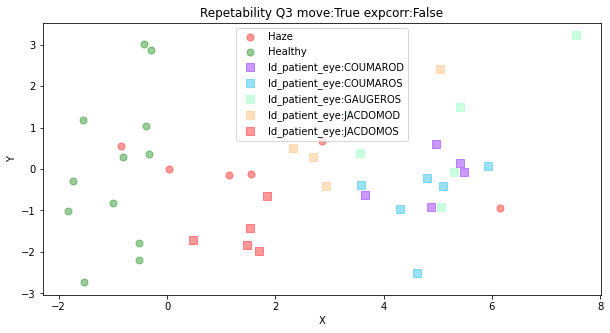

In [15]:
plt.figure(figsize=(10,5))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_fuchs_rep_new["Id_patient_eye"]))))
plt.scatter(data_haze_new["X"],data_haze_new["Y"],marker='o',c='r',s=50,label="Haze",alpha=alpha)
plt.scatter(data_healthy_new["X"],data_healthy_new["Y"],marker='o',c='g',s=50,label="Healthy",alpha=alpha)
# ax[0].scatter(data_healthy2_new["X"],data_healthy2_new["Y"],marker='o',s=50,label="Healthy",alpha=alpha)
for i,m in enumerate(np.unique(data_fuchs_rep_new["Id_patient_eye"])):
	filter=data_fuchs_rep_new["Id_patient_eye"]==m
	plt.scatter(data_fuchs_rep_new["X"][filter],data_fuchs_rep_new["Y"][filter],marker='s',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
	plt.xlabel("X")
	plt.ylabel("Y")
	# ax[0].set_xlim([np.mean(df["X"])-np.std(df["X"]),np.mean(df["X"])+np.std(df["X"])])
	# ax[0].set_ylim([np.mean(df["Y"])-np.std(df["Y"]),np.mean(df["Y"])+np.std(df["Y"])])
plt.legend()
plt.title("Repetability Q3 move:"+str(move)+" expcorr:"+str(useExpCorr))

In [16]:
print("Q3:")
for i,m in enumerate(np.unique(data_fuchs_rep_new["Id_patient_eye"])):
	filter=data_fuchs_rep_new["Id_patient_eye"]==m
	X=data_fuchs_rep_new["X"][filter]
	Y=data_fuchs_rep_new["Y"][filter]
	print(m+":\n	Xmean={:.2f}, Ymean={:.2f}\n	Xsigma={:.2f}, Ysigma={:.2f}".format(np.mean(X),np.mean(Y),np.std(X),np.std(Y)))
	# ax[0].set_xlim([np.mean(df["X"])-np.std(df["X"]),np.mean(df["X"])+np.std(df["X"])])
	# ax[0].set_ylim([np.mean(df["Y"])-np.std(df["Y"]),np.mean(df["Y"])+np.std(df["Y"])])

Q3:
COUMAROD:
	Xmean=4.88, Ymean=-0.17
	Xsigma=0.66, Ysigma=0.54
COUMAROS:
	Xmean=4.72, Ymean=-0.74
	Xsigma=0.72, Ysigma=0.85
GAUGEROS:
	Xmean=5.03, Ymean=0.92
	Xsigma=1.40, Ysigma=1.32
JACDOMOD:
	Xmean=3.25, Ymean=0.70
	Xsigma=1.05, Ysigma=1.04
JACDOMOS:
	Xmean=1.41, Ymean=-1.52
	Xsigma=0.48, Ysigma=0.47


Text(0.5, 1.0, 'Repetability Q3 move:True expcorr:False')

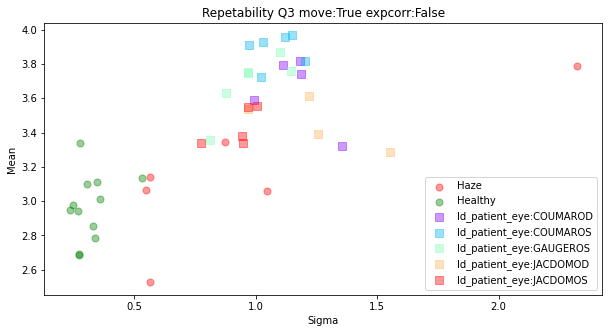

In [17]:
plt.figure(figsize=(10,5))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_fuchs_rep["Id_patient_eye"]))))
plt.scatter(data_haze["Sigma"],data_haze["Mean"],marker='o',c='r',s=50,label="Haze",alpha=alpha)
plt.scatter(data_healthy["Sigma"],data_healthy["Mean"],marker='o',c='g',s=50,label="Healthy",alpha=alpha)
# ax[0].scatter(data_healthy2_new["X"],data_healthy2_new["Y"],marker='o',s=50,label="Healthy",alpha=alpha)
for i,m in enumerate(np.unique(data_fuchs_rep["Id_patient_eye"])):
	filter=data_fuchs_rep["Id_patient_eye"]==m
	plt.scatter(data_fuchs_rep["Sigma"][filter],data_fuchs_rep["Mean"][filter],marker='s',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
	plt.xlabel("Sigma")
	plt.ylabel("Mean")
plt.legend()
plt.title("Repetability Q3 move:"+str(move)+" expcorr:"+str(useExpCorr))

In [18]:
data_fuchs_rep_new

,Healthy,Origin,Eye,Id_patient,Repetition,Id_patient_eye,X,Y,Z
0,2,COUMAR_FuchsDMEK_OD_Line_0,OD,COUMAR,0,COUMAROD,5.491672,-0.063282,-0.550961
1,2,COUMAR_FuchsDMEK_OD_Line_1,OD,COUMAR,1,COUMAROD,4.883675,-0.908373,-0.060574
2,2,COUMAR_FuchsDMEK_OD_Line_2,OD,COUMAR,2,COUMAROD,5.414480,0.156236,-0.437999
3,2,COUMAR_FuchsDMEK_OD_Line_3,OD,COUMAR,3,COUMAROD,4.966288,0.602515,-0.825761
4,2,COUMAR_FuchsDMEK_OD_Line_4,OD,COUMAR,4,COUMAROD,3.664200,-0.614948,-0.342342
5,2,COUMAR_FuchsDMEK_OS_Line_0,OS,COUMAR,0,COUMAROS,4.805184,-0.225604,-0.919018
6,2,COUMAR_FuchsDMEK_OS_Line_1,OS,COUMAR,1,COUMAROS,5.932174,0.063809,2.784015
7,2,COUMAR_FuchsDMEK_OS_Line_2,OS,COUMAR,2,COUMAROS,4.610477,-2.499523,9.998683
8,2,COUMAR_FuchsDMEK_OS_Line_3,OS,COUMAR,3,COUMAROS,4.307284,-0.968328,-0.664326
9,2,COUMAR_FuchsDMEK_OS_Line_4,OS,COUMAR,4,COUMAROS,3.573221,-0.385764,-1.090975


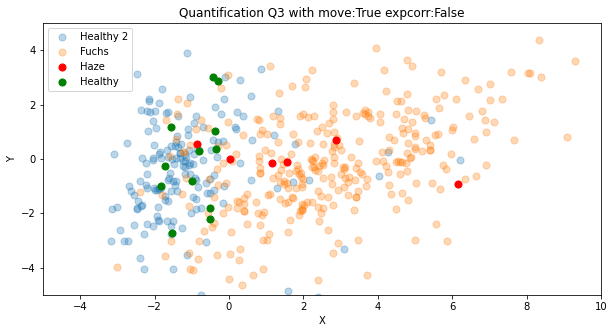

In [19]:
plt.figure(figsize=(10,5))
alpha=0.3
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_fuchs_rep_new["Id_patient_eye"]))))
plt.scatter(data_healthy2_new["X"],data_healthy2_new["Y"],marker='o',s=50,label="Healthy 2",alpha=alpha)
plt.scatter(data_fuchs_new["X"],data_fuchs_new["Y"],marker='o',s=50,label="Fuchs",alpha=alpha)
plt.scatter(data_haze_new["X"],data_haze_new["Y"],marker='o',c='r',s=50,label="Haze",alpha=1)
plt.scatter(data_healthy_new["X"],data_healthy_new["Y"],marker='o',c='g',s=50,label="Healthy",alpha=1)
plt.xlim([-5,10])
plt.ylim([-5,5])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Quantification Q3 with move:"+str(move)+" expcorr:"+str(useExpCorr))
plt.legend()

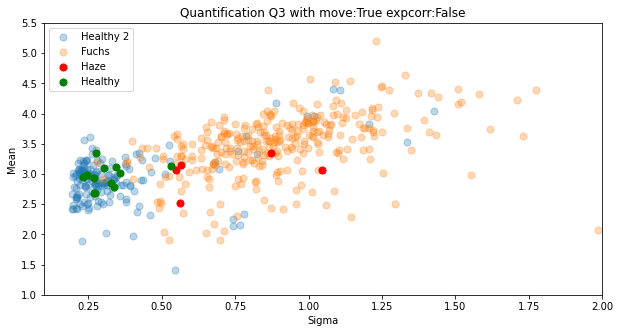

In [20]:
plt.figure(figsize=(10,5))
alpha=0.3
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_fuchs_rep_new["Id_patient_eye"]))))
plt.scatter(data_healthy_2["Sigma"],data_healthy_2["Mean"],marker='o',s=50,label="Healthy 2",alpha=alpha)
plt.scatter(data_fuchs["Sigma"],data_fuchs["Mean"],marker='o',s=50,label="Fuchs",alpha=alpha)
plt.scatter(data_haze["Sigma"],data_haze["Mean"],marker='o',c='r',s=50,label="Haze",alpha=1)
plt.scatter(data_healthy["Sigma"],data_healthy["Mean"],marker='o',c='g',s=50,label="Healthy",alpha=1)
plt.xlim([0.1,2])
plt.ylim([1,5.5])
plt.xlabel("Sigma")
plt.ylabel("Mean")
plt.title("Quantification Q3 with move:"+str(move)+" expcorr:"+str(useExpCorr))
plt.legend()

# Can we still classificate correctly ? 

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

loo = LeaveOneOut()
loo.get_n_splits(Z)
result=[]
result_pred=[]
conf=np.zeros((2,2))
for train_index, test_index in loo.split(X):
	print("TRAIN:", train_index, "TEST:", test_index)
	X_train, X_test = Z[train_index], Z[test_index]
	y_train, y_test = C[train_index], C[test_index]
	clf = svm.SVC()
	clf.fit(X_train, y_train)
	y_predict=clf.predict(X_test)
	result.append(y_test.ravel()[0])
	result_pred.append(y_predict.ravel()[0])
	if y_predict[0]==y_test[0][0] and y_test[0][0]==0:
		conf[0,0]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==1:
		print(y_predict,y_test)
		conf[0,1]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==0:
		conf[1,0]+=1
	elif y_predict[0]==y_test[0][0] and y_test[0][0]==1:
		conf[1,1]+=1
# print(result_pred)
# print(result)
# print(result_pred==result)
# ytrain=data["Healthy"].to_numpy()
print(conf)

In [34]:
X=data_learning.drop(["Origin","Healthy"],axis=1)
y=data_learning["Healthy"]
regr = svm.SVR()
regr.fit(X, y)

SVR()

In [37]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)
loo.split(X)

<generator object BaseCrossValidator.split at 0x0000022829FE9A50>